In [3]:
#Import modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

#load read count dataset
deseq2_df = pd.read_csv("2.2b_ex2_deseq_output_modified.tsv",sep=",",comment='#',index_col=0)
deseq2_df = deseq2_df.set_index('index').T.reset_index()
deseq2_df = deseq2_df.rename(columns={'index':'Geneid'})
deseq2_df

index        Geneid    baseMean  log2FoldChange     lfcSE         pvalue  \
0            WASH7P  108.158509        0.096715  0.179718   5.834321e-01   
1      LOC100133331   65.145814       -0.362565  0.431068   3.336229e-01   
2      LOC100288069   45.876601       -0.277239  0.244099   2.366208e-01   
3         LINC00115   75.323309       -0.007138  0.204070   9.701801e-01   
4         LOC643837  237.056072        0.036745  0.128368   7.732421e-01   
...             ...         ...             ...       ...            ...   
14401         MTCP1   86.680106        0.002960  0.181997   9.877517e-01   
14402         BRCC3  238.146325       -0.212312  0.122864   8.069483e-02   
14403          VBP1  253.376070       -0.066955  0.128907   5.988750e-01   
14404         TMLHE   75.107741        0.427131  0.195525   2.503444e-02   
14405          CD24  577.163703       -5.142412  0.171877  1.211944e-196   

index           padj  
0       6.707839e-01  
1       4.277856e-01  
2       3.231358e-01  
3       9.781925e-01  
4       8.301778e-01  
...              ...  
14401   9.907088e-01  
14402   1.311621e-01  
14403   6.837370e-01  
14404   4.713713e-02  
14405  4.258357e-194  

[14406 rows x 6 columns]

In [5]:
#Tidy the data
tidy_deseq2_df=deseq2_df.melt(id_vars='Geneid')
tidy_deseq2_df

Geneid     index          value
0            WASH7P  baseMean   1.081585e+02
1      LOC100133331  baseMean   6.514581e+01
2      LOC100288069  baseMean   4.587660e+01
3         LINC00115  baseMean   7.532331e+01
4         LOC643837  baseMean   2.370561e+02
...             ...       ...            ...
72025         MTCP1      padj   9.907088e-01
72026         BRCC3      padj   1.311621e-01
72027          VBP1      padj   6.837370e-01
72028         TMLHE      padj   4.713713e-02
72029          CD24      padj  4.258357e-194

[72030 rows x 3 columns]


Mark genes with padj < 0.05 or > 0.05
Generate an MA plot for the samples.
Color significant genes:
red=Up
blue=Down
grey=Unchanged
Generate a Volcano plot for the samples.
Annotate the FDR cutoff (with vertical lines)
Annotate the minimum Log2FC
Annotate the top 10 most significant genes'''

In [76]:
#Mark genes with padj < 0.05 or > 0.05
mask = deseq2_df["padj"] < 0.00005 
deseq2_df['sig']=mask.to_frame()
#deseq2_df[mask]
deseq2_df['logbaseMean']=np.log2(deseq2_df['baseMean'])
deseq2_df

index        Geneid    baseMean  log2FoldChange     lfcSE         pvalue  \
0            WASH7P  108.158509        0.096715  0.179718   5.834321e-01   
1      LOC100133331   65.145814       -0.362565  0.431068   3.336229e-01   
2      LOC100288069   45.876601       -0.277239  0.244099   2.366208e-01   
3         LINC00115   75.323309       -0.007138  0.204070   9.701801e-01   
4         LOC643837  237.056072        0.036745  0.128368   7.732421e-01   
...             ...         ...             ...       ...            ...   
14401         MTCP1   86.680106        0.002960  0.181997   9.877517e-01   
14402         BRCC3  238.146325       -0.212312  0.122864   8.069483e-02   
14403          VBP1  253.376070       -0.066955  0.128907   5.988750e-01   
14404         TMLHE   75.107741        0.427131  0.195525   2.503444e-02   
14405          CD24  577.163703       -5.142412  0.171877  1.211944e-196   

index           padj    sig  logbaseMean Change    -logpadj  
0       6.707839e-01  False     6.757003     NS    0.173417  
1       4.277856e-01  False     6.025601     NS    0.368774  
2       3.231358e-01  False     5.519687     NS    0.490615  
3       9.781925e-01  False     6.235024     NS    0.009576  
4       8.301778e-01  False     7.889085     NS    0.080829  
...              ...    ...          ...    ...         ...  
14401   9.907088e-01  False     6.437629     NS    0.004054  
14402   1.311621e-01  False     7.895704     NS    0.882192  
14403   6.837370e-01  False     7.985136     NS    0.165111  
14404   4.713713e-02  False     6.230890     NS    1.326637  
14405  4.258357e-194   True     9.172837   Down  193.370758  

[14406 rows x 10 columns]

In [77]:
#Re-tidy data
tidy_deseq2_df=deseq2_df.melt(id_vars='Geneid')
tidy_deseq2_df

Geneid     index       value
0             WASH7P  baseMean  108.158509
1       LOC100133331  baseMean   65.145814
2       LOC100288069  baseMean   45.876601
3          LINC00115  baseMean   75.323309
4          LOC643837  baseMean  237.056072
...              ...       ...         ...
129649         MTCP1  -logpadj    0.004054
129650         BRCC3  -logpadj    0.882192
129651          VBP1  -logpadj    0.165111
129652         TMLHE  -logpadj    1.326637
129653          CD24  -logpadj  193.370758

[129654 rows x 3 columns]

<AxesSubplot:xlabel='logbaseMean', ylabel='log2FoldChange'>

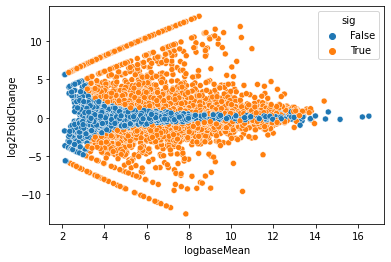

In [78]:
sns.scatterplot(data=deseq2_df,x='logbaseMean',y='log2FoldChange',hue='sig')

<AxesSubplot:xlabel='logbaseMean', ylabel='log2FoldChange'>

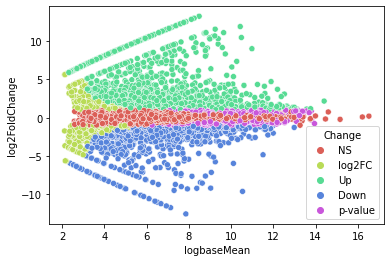

In [79]:
#Mark genes as up, down or unchanged
def change(s):
    if (s['sig'] == True):
        if (s['log2FoldChange'] > 1):
            return 'Up'
        elif (s['log2FoldChange'] < -1):
            return 'Down'
        else:
            return 'p-value'
    else:
        if (s['log2FoldChange'] > 1):
            return 'log2FC'
        elif (s['log2FoldChange'] < -1):
            return 'log2FC'
        else:
            return 'NS'

deseq2_df['Change'] = deseq2_df.apply(change, axis=1)

#using seaborn
sns.scatterplot(data=deseq2_df,x='logbaseMean',y='log2FoldChange',hue='Change',palette='hls')


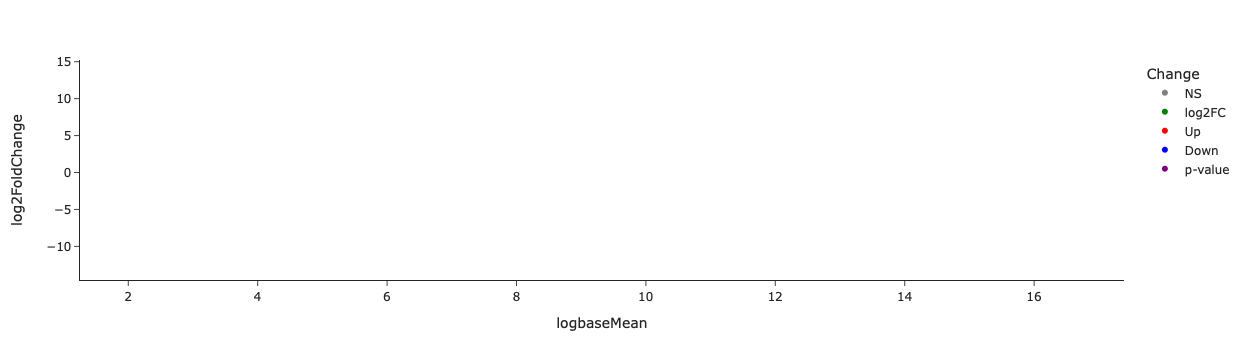

In [106]:
#using plotly
px.scatter(deseq2_df,x='logbaseMean',y='log2FoldChange',
           color_discrete_map={'Down':'blue','Up':'red','NS':'grey','p-value':'purple','log2FC':'green'},
           color='Change',
          hover_data=['Geneid'],
          template='simple_white')

/Users/danfountain/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



<AxesSubplot:xlabel='log2FoldChange', ylabel='-logpadj'>

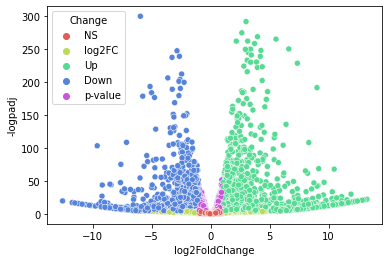

In [107]:
#Make volcano plot
#Transform y axis
deseq2_df['-logpadj']=-(np.log10(deseq2_df['padj']))
sns.scatterplot(data=deseq2_df,x='log2FoldChange',y='-logpadj',hue='Change',palette='hls')

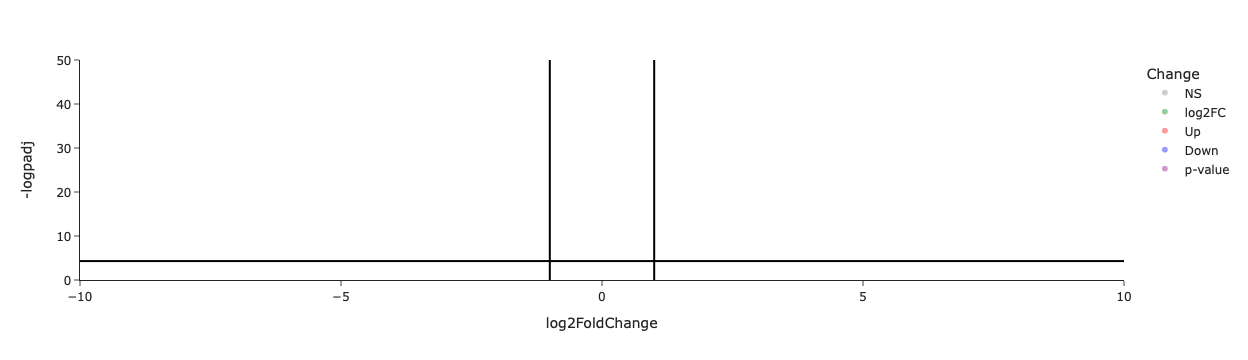

In [110]:
#using plotly
hline=-(np.log10(0.00005))
fig = px.scatter(deseq2_df,y='-logpadj',x='log2FoldChange',
            color_discrete_map={'Down':'blue','Up':'red','NS':'grey','p-value':'purple','log2FC':'green'},
            color='Change',
            hover_data=['Geneid'],
            opacity=0.4,
            template='simple_white',
            )
fig.update_layout(yaxis_range=[0,50])
fig.update_layout(xaxis_range=[-10,10])
fig.add_hline(y=hline, opacity=1, line_width=2)
fig.add_vline(x="-1", opacity=1, line_width=2)
fig.add_vline(x="1", opacity=1, line_width=2)


